# Sankey diagram development

In [154]:
import plotly.graph_objects as go
import btrack
import numpy as np
import json
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from macrohet import visualise, colours
import plotly.graph_objects as go
import matplotlib as mpl
# Set the default font to Helvetica
mpl.rcParams['font.family'] = 'Liberation Sans'

# Extracting some preliminary data

In [4]:
expt_ID = 'PS0000'
acq_ID = row, column = (3, 5)

In [5]:
tracks_fn = f'/mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/{acq_ID}.h5'
dict_fn = f'/mnt/DATA/macrohet/{expt_ID}/upstream_development/tracking/tracking_performance/v1>70/{row},{column}/{acq_ID}_track_assessment.json'

In [6]:
with btrack.io.HDF5FileHandler(tracks_fn, 'r', obj_type='obj_type_1') as reader:
    tracks = reader.tracks

[INFO][2024/01/02 01:19:14 PM] Opening HDF file: /mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/(3, 5).h5...
[INFO][2024/01/02 01:19:14 PM] Loading tracks/obj_type_1
[INFO][2024/01/02 01:19:14 PM] Loading LBEP/obj_type_1
[INFO][2024/01/02 01:19:14 PM] Loading objects/obj_type_1 (41424, 5) (41424 filtered: None)
[INFO][2024/01/02 01:19:15 PM] Closing HDF file: /mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/(3, 5).h5


In [7]:
with open(dict_fn) as json_data:
    track_dict = json.load(json_data)

In [8]:
track_dict

{'425': True,
 '694': True,
 '403': False,
 '427': True,
 '453': False,
 '217': True,
 '1002': False,
 '1893': False,
 '1986': False,
 '2192': False,
 '401': True,
 '412': False,
 '2499': False,
 '1446': False,
 '1003': True,
 '790': False,
 '1552': False,
 '2862': False,
 '432': True,
 '456': True,
 '461': True,
 '416': True,
 '1892': False,
 '430': True,
 '1226': True,
 '1783': True,
 '429,2818': 'Link',
 '431': True,
 '407': True,
 '2675,404': 'Link',
 '398': True,
 '423': True,
 '424': True,
 '428': False,
 '418': False,
 '411': False,
 '411,1683': 'Link',
 '1058': False,
 '466': True,
 '465': True,
 '397': True,
 '426': True,
 '419': True,
 '1735': True,
 '420': True,
 '421': True,
 '802': True,
 '455': False,
 '406': False,
 '410': True,
 '411,1118': 'Link',
 '1118': True,
 '1114,2130': 'Link',
 '414': True,
 '459': True,
 '2234': True,
 '470': True,
 '437': True,
 '1649,2453': 'Link',
 '2453,3126': 'Link',
 '444': True,
 '865': False,
 '441': True,
 '318': False,
 '2952': False,

In [28]:
true_IDs = [int(ID) for ID in track_dict.keys() if track_dict[ID] == True]

In [29]:
true_tracks = [t for t in tracks if t.ID in true_IDs]

In [30]:
len(true_tracks)

384

In [31]:
test_track = true_tracks[0]

In [32]:
test_track

,ID,t,x,y,z,parent,root,state,generation,dummy,major_axis_length,Infected,mean_intensity,orientation,area,minor_axis_length
0,423,0,723.909912,33.010132,0.000000,423,423,5,0,False,344.046997,1.0,"(3,) array",-0.105442,23203.0,87.624420
1,423,1,727.771362,38.211437,0.000000,423,423,5,0,False,410.356964,1.0,"(3,) array",-0.105384,25659.0,95.545296
2,423,2,730.887634,26.283424,0.000000,423,423,5,0,False,281.636444,1.0,"(3,) array",-0.172310,19483.0,89.392372
3,423,3,732.147583,27.895367,0.000000,423,423,5,0,False,325.991333,1.0,"(3,) array",-0.172292,22840.0,92.556488
4,423,4,730.891357,33.019173,0.000000,423,423,5,0,False,373.707001,1.0,"(3,) array",-0.152742,23224.0,80.582886
5,423,5,731.606384,30.630995,0.000000,423,423,5,0,False,351.986481,1.0,"(3,) array",-0.151112,21159.0,78.869858
6,423,6,732.788086,30.744682,0.000000,423,423,5,0,False,358.099487,1.0,"(3,) array",-0.169930,21750.0,79.728958
7,423,7,733.528625,27.149408,0.000000,423,423,5,0,False,294.958893,0.0,"(3,) array",-0.195798,15457.0,67.987579
8,423,8,733.524414,32.480957,0.000000,423,423,5,0,False,385.717529,1.0,"(3,) array",-0.201907,21431.0,73.575928
9,423,9,735.238953,29.900726,0.000000,423,423,5,0,False,409.529633,1.0,"(3,) array",-0.251289,22385.0,79.070381


In [35]:
# load sc_df 
df = pd.read_pickle(f'/mnt/DATA/macrohet/{expt_ID}/results/preliminary_sc_measures/sc_dfs/(3, 5)_<70_sc_df_GT_dev.pkl')

In [36]:
len(df[df['Acquisition ID'] == acq_ID]['Unique ID'].unique())

384

In [95]:
# updated df to include all shorter tracks with mtb area measurements
df = pd.read_pickle(f'/mnt/DATA/macrohet/{expt_ID}/results/preliminary_sc_measures/sc_dfs/{acq_ID}_<70_sc_df_GT_dev.pkl')
df

,Time (hours),Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,Mphi GFP,x,y,Eccentricity,MSD,Technical Replicate,Strain/Compound,Mtb Area µm2,Mtb RFP,Mtb RFP thresholded
0,0,WT,CTRL,EC0,1.3.5,"(3, 5)",1,29567.0,2220.025391,519.922607,876.779602,0.859159,0.000000,1,CTRL,46.797680,473.168976,167.325424
1,1,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26181.0,2549.692383,522.290833,876.766357,0.847926,2.368262,1,CTRL,48.719647,498.701813,202.661972
2,2,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26043.0,2653.458740,524.336243,874.563110,0.860501,3.006327,1,CTRL,52.206007,502.468353,210.382874
3,3,WT,CTRL,EC0,1.3.5,"(3, 5)",1,25605.0,2736.911621,516.952454,876.656799,0.728416,7.674886,1,CTRL,50.552221,501.905182,212.070969
4,4,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26430.0,2490.947266,521.947449,880.909363,0.530618,6.560051,1,CTRL,54.463202,502.564423,204.565842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22813,70,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,39979.0,2201.615723,579.509094,651.614807,0.970827,2.473534,1,CTRL,0.000000,378.059143,0.000000
22814,71,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,38456.0,2243.430664,579.219421,651.633118,0.972632,0.290251,1,CTRL,0.000000,377.311035,0.000000
22815,72,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,39006.0,2209.442627,578.878113,652.432434,0.968598,0.869137,1,CTRL,0.000000,378.968353,0.000000
22816,73,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,35816.0,2537.284668,579.752319,652.408752,0.969917,0.874527,1,CTRL,0.000000,379.737701,0.000000


In [97]:
len(df['Unique ID'].unique())

384

### Start by classifying N_infected vs N_uninf

What classifies as infected versus uninfected? A single frame at t=0 is not enough to say the cell is infected... 

### Start by having a variable that we can vary

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



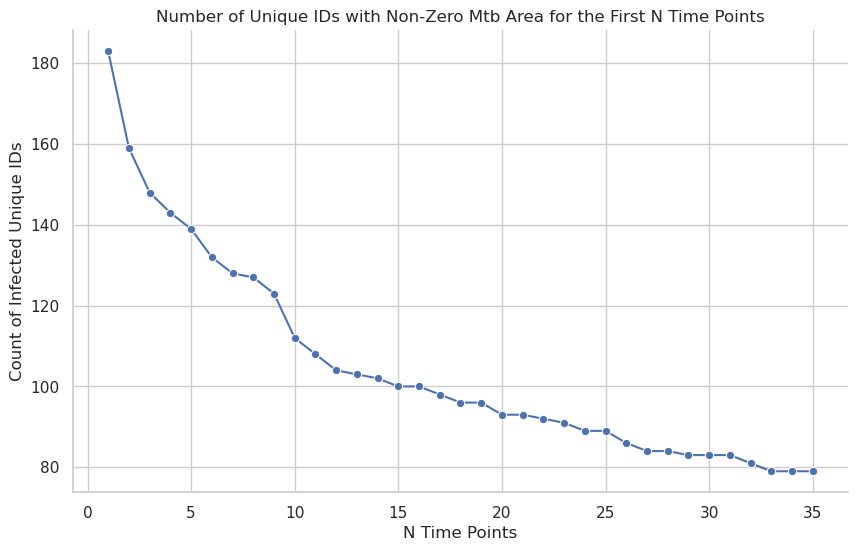

In [37]:
results = []  # To store results for each N

# Iterate over a range of N values
for N in range(1, 36):  # Iterate from 1 to 35

    # Define the function within the loop to capture the current value of N
    def check_non_zero_mtb(group):
        group = group.reset_index(drop=True)
        return (group.head(N)['Mtb Area µm2'] > 0).all()

    # Group by Unique ID and sort within groups by Time (hours)
    grouped = df.sort_values('Time (hours)').groupby('Unique ID')

    # Apply the function to each group and count the True values
    count_infected = grouped.apply(check_non_zero_mtb).sum()

    # Append the result to the results list
    results.append({'N': N, 'Count_Infected': count_infected})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plotting
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

# Create the line plot
sns.lineplot(x='N', y='Count_Infected', data=results_df, marker='o')

# Despine the plot
sns.despine()

# Adding title and labels
plt.title('Number of Unique IDs with Non-Zero Mtb Area for the First N Time Points')
plt.xlabel('N Time Points')
plt.ylabel('Count of Infected Unique IDs')

# Show the plot
plt.show()

### Deciding that N = 3 for number of infected frames for a cell to count as initially infected

This ensures that there are three seperate observations that are each an hour apart, I think this is sufficient to nearly guarantee that a cell is infected and not merely co-localising with a clump of mtb. Previous observations (`macrohet/upstream_labelling/classification/what_min_mtb_area_thresh.ipynb`) indicate that a single bacillus is 88 pixels big, so anything above that counts. Using the resolution scale factor, converted to µm^2, this corresponds to `88*((1.4949402023919043e-07*1_000_000)**2) = 1.9666646636802418µm^2`

In [62]:
min_mtb_area_thresh_µm = 88*((1.4949402023919043e-07*1_000_000)**2)

In [110]:
N_init_infected = N_init_uninfected = N_fin_infected = N_fin_uninfected = 0
N_stayed_infected = N_got_infected = N_stayed_uninfected = N_got_uninfected = 0

infect_status_dict = {'Initial Infection Status': {}, 'Final Infection Status': {}}

for track_ID in df['Unique ID'].unique():
    subset_df = df[df['Unique ID'] == track_ID]
    
    # Check initial infection status
    initial_infected = all(subset_df.iloc[:3]['Mtb Area µm2'] > min_mtb_area_thresh_µm)
    infect_status_dict['Initial Infection Status'][track_ID] = initial_infected
    if initial_infected:
        N_init_infected += 1
    else:
        N_init_uninfected += 1

    # Check final infection status
    final_infected = all(subset_df.iloc[-3:]['Mtb Area µm2'] > min_mtb_area_thresh_µm)
    infect_status_dict['Final Infection Status'][track_ID] = final_infected
    if final_infected:
        N_fin_infected += 1
    else:
        N_fin_uninfected += 1

    # Check transition status
    if initial_infected and final_infected:
        N_stayed_infected += 1
    elif not initial_infected and final_infected:
        N_got_infected += 1
    elif initial_infected and not final_infected:
        N_got_uninfected += 1
    elif not initial_infected and not final_infected:
        N_stayed_uninfected += 1


In [109]:
N_init_infected, N_init_uninfected, N_fin_infected, N_fin_uninfected 

(125, 259, 224, 160)

In [112]:
N_init_infected, N_init_uninfected #: Counts of initially infected and uninfected


(125, 259)

In [113]:
N_fin_infected, N_fin_uninfected #: Counts of finally infected and uninfected


(224, 160)

In [114]:
N_stayed_infected, N_got_infected, N_stayed_uninfected, N_got_uninfected #: Transition counts

(111, 113, 146, 14)

In [146]:
link_colors

['#d02c91', '#1a9641', '#f1b6da', '#a6d96a']

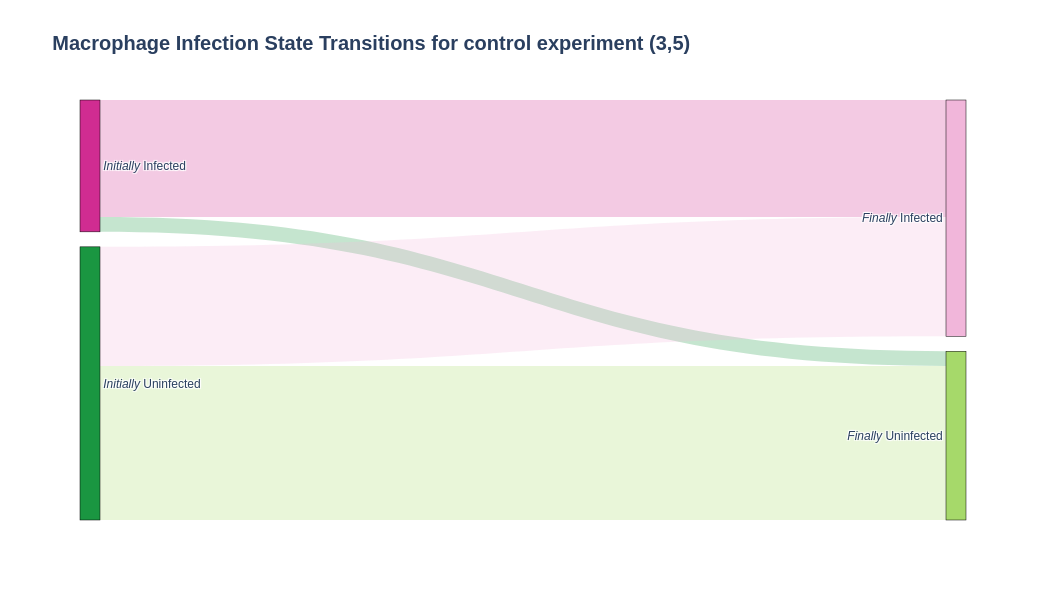

In [168]:

# Define source, target, and value for Sankey diagram
source = [0, 0, 1, 1]  # 0: Initially Infected, 1: Initially Uninfected
target = [2, 3, 2, 3]  # 2: Finally Infected, 3: Finally Uninfected
value = [
    N_stayed_infected,     # Initially Infected -> Finally Infected
    N_got_uninfected,      # Initially Infected -> Finally Uninfected
    N_got_infected,        # Initially Uninfected -> Finally Infected
    N_stayed_uninfected    # Initially Uninfected -> Finally Uninfected
]
# Assuming colours.expanded_piyg is a list of hex colors
link_colors = [f'rgba({int(color[1:3], 16)}, {int(color[3:5], 16)}, {int(color[5:7], 16)}, 0.25)' for color in [colours.expanded_piyg[i] for i in [-1, 0, -2, 1]]]

# Define labels for nodes
labels = ["<i>Initially</i> Infected", "<i>Initially</i> Uninfected", "<i>Finally</i> Infected", "<i>Finally</i> Uninfected"]
node_colors =  [colours.expanded_piyg[i] for i in [-1,0, -2, 1]] #['blue', 'green', 'red', 'yellow']  # Example node colors

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,        
        color=node_colors  # Set node colors

    ),
    link=dict(
        source=source,
        target=target,
        value=value, 
        color=link_colors
    ))])

fig.update_layout(
    title_text="Macrophage Infection State Transitions for control experiment (3,5)",
    # font_size=12,
    width=800,  # Set the width of the figure
    height=600,  # Set the height of the figure
    font_family="Liberation Sans", 
    title=dict(text="<b>Macrophage Infection State Transitions for control experiment (3,5)<b>", font=dict(size=20),)
)

fig.write_html("WIP-sankey-diagram.html")
fig.show()